# Metodos Numericos Segundo Bimestre Notebook

Nombre: Anthony Alexander Contreras Carrión

Materia: Metodos Numericos

Fecha: 22-07-2025

## Contenido del Notebook

En esta version del notebook trataremos los temas que se ha visto durante el segundo bimestre de la materia de Metodos Numericos, como son:

## 📚 **Índice de Contenidos**

### 🔢 Resolución de Sistemas de Ecuaciones a través de matrices pon un emoji de algo con matemáticas

   - Eliminación Gaussiana
   - Gauss-Jordan
   - Descomposición LU, método matriz inversa
   - Descomposición LU, producto de matrices
   - Descomposición LU: Doolittle
   - Descomposición LU: Crout
   - Descomposición LU: Cholesky
   - Gauss-Jacobi
   - Gauss-Seidel
   - Método de Euler
   - Método de Euler mejorado
   - Método de Taylor de mayor orden
   - Método de Runge Kutta

### 📘 Cómo funciona este notebook
Para resolver las distintas tipos de ecuaciones mediante matrices, no se utilizarán librerías de Python como Numpy o Scipy 🐍, ya que se busca entender el funcionamiento de los métodos y no simplemente utilizarlos.  🔢 En la mayoría de los casos, se busca encontrar la solución para x y z. No obstante, en los métodos de LU se busca encontrar la matriz L y U, que son las matrices triangulares inferiores y superiores respectivamente. Además, se calculan y₁, y₂, y₃, que son las soluciones parciales del sistema, y x₁, x₂, x₃, que son las soluciones finales del sistema.

Cuando se hace referenica a la matriz A es la matriz de coeficientes del sistema de ecuaciones, y b es el vector de términos independientes.


# Eliminación Gaussiana
En este método se busca transformar el sistema de ecuaciones en una forma escalonada, eliminando las incógnitas de las ecuaciones inferiores.

Vamos a utilizar el siguiente sistema de ecuaciones como ejemplo:

$$
\begin{aligned}
2x + 3/5y + z &= 18 \\
4x + y + 2z &= 20 \\
3x + 2y + 4z &= -4
\end{aligned}
$$

In [83]:
def eliminacion_gaussiana(A, b):
    """
    Resolver un sistema de ecuaciones lineales Ax = b utilizando eliminación Gaussiana.
    :param A: Matriz de coeficientes.
    :param b: Vector de términos independientes.
    :return: Vector solución x.
    """
    n = len(b)
    for i in range(n):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    # Intercambiar filas si el pivote es cero
                    A[i], A[j] = A[j], A[i]
                    b[i], b[j] = b[j], b[i]
                    break
                else:
                    print(f"La variable x no participa directamente en la ecuacion, por lo tanto no se puede resolver el sistema de ecuaciones.")
        for j in range(i + 1, n):
            if A[j][i] != 0:  # Si elemento abajo del pivote es cero no lo tomamos en cuenta
                factor = A[j][i] / A[i][i]
                for k in range(i, n):
                    # Se multiplica por toda la fila, por eso el único elemento que cambia es k.
                    A[j][k] -= factor * A[i][k]
                b[j] -= factor * b[i]

    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - sum(A[i][j] * x[j] for j in range(i + 1, n))) / A[i][i]
    return x

A = [[2, 3/5, 1],[4, 1, 2],[3, 2, 4]]
b = [18, 20, -4]

solucion = eliminacion_gaussiana(A,b)
print(f"Soluciones: x₁ = {solucion[0]:.2f}, x₂ = {solucion[1]:.2f}, x₃ = {solucion[2]:.2f}")


Soluciones: x₁ = 8.80, x₂ = 80.00, x₃ = -47.60


# Gauss-Jordan
En este método se busca transformar el sistema de ecuaciones en una forma reducida, eliminando las incógnitas de todas las ecuaciones.
Para este ejemplo tomaremos como base el mismo sistema de ecuaciones y el codigo que teniamos vamos a modificarlo para que se ajuste a este metodo.

In [84]:
def gauss_jordan(A, b):
    """
    Resolver un sistema de ecuaciones lineales Ax = b utilizando el método de Gauss-Jordan.
    :param A: Matriz de coeficientes.
    :param b: Vector de términos independientes.
    :return: Vector de soluciones x.
    """
    n = len(b)
    # Codigo Reutilizado
    for i in range(n):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    # Intercambiar filas si el pivote es cero
                    A[i], A[j] = A[j], A[i]
                    b[i], b[j] = b[j], b[i]
                    break
                else:
                    print(f"La variable x no participa directamente en la ecuacion, por lo tanto no se puede resolver el sistema de ecuaciones.")
        for j in range(i + 1, n):
            if A[j][i] != 0:
                factor = A[j][i] / A[i][i]
                for k in range(i, n):
                    A[j][k] -= factor * A[i][k]
                b[j] -= factor * b[i]

    # Eliminación hacia atrás (Jordan)
    for a in range(n - 1, -1, -1):
        for c in range(a - 1, -1, -1):
            if A[c][a] != 0:
                factor = A[c][a] / A[a][a]
                for k in range(a, n):
                    A[c][k] -= factor * A[a][k]
                b[c] -= factor * b[a]

    # Normalizar diagonal
    for x in range(n):
        if A[x][x] == 0.0 and b[x] != 0.0:
                raise ValueError("El sistema no tiene soluciones únicas.")
        else:
            b[x] /= A[x][x]
            A[x][x] = 1  # Normalizar explícito, opcional
    return b


A = [[2, 3/5, 1],[4, 1, 2],[3, 2, 4]]
b = [18, 20, -4]

solucion = gauss_jordan(A, b)
print(f"Soluciones: x₁ = {solucion[0]:.2f}, x₂ = {solucion[1]:.2f}, x₃ = {solucion[2]:.2f}")


Soluciones: x₁ = 8.80, x₂ = 80.00, x₃ = -47.60


# Método matriz inversa

En este metodo se busca en contrar la matiz inversa de A y luego multiplicar la matriz inversa por el vector b para obtener el vector solución x.
Vamos a tomar el mismo sistema de ecuaciones que hemos estado utilizando como ejemplo.


In [85]:
def matriz_inversa(A):
    """
    Calcular la matriz inversa de A utilizando el método de Gauss-Jordan.
    :param A: matriz cuadrada.
    :return: matriz inversa de A.
    """
    n = len(A)
    I = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    for i in range(n):
        A[i] += I[i]  # Combinar A | I

    for i in range(n):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    break
            else:
                raise ValueError("La matriz es singular y no tiene inversa.")

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            if A[j][i] != 0:
                factor = A[j][i] / A[i][i]
                for k in range(i, 2 * n):
                    A[j][k] -= factor * A[i][k]

    # Eliminación hacia atrás
    for a in range(n - 1, -1, -1):
        for c in range(a - 1, -1, -1):
            if A[c][a] != 0:
                factor = A[c][a] / A[a][a]
                for k in range(a, 2 * n):
                    A[c][k] -= factor * A[a][k]

    # Normalizar diagonal
    for i in range(n):
        factor = A[i][i]
        if factor == 0:
            raise ValueError("La matriz es singular y no tiene inversa.")
        for k in range(i, 2 * n):
            A[i][k] /= factor

    # Extraer inversa
    inv_A = [row[n:] for row in A]
    return inv_A

def multiplicacion_matrices(A, b):
    """
    Multiplicar la matriz inversa por el vector b para obtener el vector solución x.
    :return: Vector solución x.
    """
    longitud =len(b) # En estos casos estoy suponiendo que todas las matrices deben ser cuadradas
    inv_A = matriz_inversa(A)
    x = [sum(inv_A[i][j] * b[j] for j in range(longitud)) for i in range(longitud)]
    return x

A = [[2, 3/5, 1],[4, 1, 2],[3, 2, 4]]
b = [18, 20, -4]

solucion = multiplicacion_matrices(A, b)
print(f"Soluciones: x₁ = {solucion[0]:.2f}, x₂ = {solucion[1]:.2f}, x₃ = {solucion[2]:.2f}")

Soluciones: x₁ = 8.80, x₂ = 80.00, x₃ = -47.60


# Descomposición LU, producto de matrices
## Descomposición LU: Doolittle

La descomposición LU es un método que descompone una matriz A en el producto de dos matrices: L (triangular inferior) donde la diagonal es 1  y U (triangular superior). Este método es útil para resolver sistemas de ecuaciones lineales. Basado en la primera parte vamos a calcular la matriz L y U, y luego resolver el sistema de ecuaciones Ax = b utilizando la descomposición LU basado en el método de Doolittle.

In [86]:
def descomposicion_LU(A):
    """
    Descomponer la matriz A en el producto de L y U.
    :param A: Matriz cuadrada.
    :return: Matrices L y U.
    """
    n = len(A)
    L = [[0] * n for _ in range(n)]
    U = [[0] * n for _ in range(n)]

    for i in range(n):
        # L es triangular inferior
        if A[i][i] == 0:
            print("La matriz es singular y no se puede descomponer en LU.")
            break
        L[i][i] = 1  # Diagonal de L es 1
        for j in range(i + 1, n):
            if A[j][i] != 0:
                L[j][i] = A[j][i] / A[i][i]
            for k in range(i + 1, n):
                A[j][k] -= L[j][i] * A[i][k]

        # U es triangular superior
        for j in range(i, n):
            U[i][j] = A[i][j]

    return L, U

def descomposicion_LU_producto(L,U) -> A:
    """
    Vamos a calcular la matriz con el producto de las matrices L y U
    :param L: Matriz diagonal inferior con 1 en la diagonal.
    :param U: Matriz diagonal superior
    :return:
    """
    n = len(L)
    A = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            A[i][j] = sum(L[i][k] * U[k][j] for k in range(n))

    return A


def solucion(A, b):
    """
    Resolver Ax = b usando LU: primero Ly = b , luego Ux = y .
    :param A: Matriz de coeficientes.
    :param b: Vector de términos independientes.
    :return: Vector solución x.
    """
    n = len(b)
    L, U = descomposicion_LU(A)

    y = [0] * n
    x = [0] * n


    for i in range(n):
        y[i] = (b[i] - sum(L[i][j] * y[j] for j in range(i))) / L[i][i]


    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]

    return x


A = [[2, 3/5, 1],[4, 1, 2],[3, 2, 4]]
b = [18, 20, -4]
# Multiplicar LU para obtener A
L, U = descomposicion_LU(A)
A = descomposicion_LU_producto(L,U)
print(f"Matriz A (producto de L y U):{A}")

# Metodo de Doolittle
matriz = solucion(A,b)

print(f"Soluciones: x₁ = {matriz[0]:.2f}, x₂ = {matriz[1]:.2f}, x₃ = {matriz[2]:.2f}")


Matriz A (producto de L y U):[[2, 0.6, 1.0], [4.0, 1.0, 2.0], [3.0, 2.0, 4.0]]
Soluciones: x₁ = 8.80, x₂ = 80.00, x₃ = -47.60


# Descomposición LU: Crout y Cholesky

Ahora vamos a ver como descomponer A en L y U utilizando los metodos de Crout y Cholesky, que son dos metodos de descomposicion LU.

In [87]:
# Crout

def descomposicion_LU_crout(A):
    n = len(A)
    A = [row[:] for row in A] # Copeamos la matriz para demostrar que se puede descomponer
    L = [[0] * n for _ in range(n)]
    U = [[0] * n for _ in range(n)]

    for i in range(n):
        U[i][i] = 1  # Diagonal de U en Crout es 1
        for j in range(i, n):  # L
            L[j][i] = A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))
        for j in range(i + 1, n):  # U
            if L[i][i] == 0:
                raise ValueError("La matriz es singular.")
            U[i][j] = (A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))) / L[i][i]

    return L, U

A = [[2, 3/5, 1],[4, 1, 2],[3, 2, 4]]
b = [18, 20, -4]
# Multiplicar LU para obtener A
L, U = descomposicion_LU_crout(A)
A = descomposicion_LU_producto(L,U)
print(f"Matriz A (producto de L y U):{A}")

Matriz A (producto de L y U):[[2, 0.6, 1.0], [4.0, 1.0, 2.0], [3.0, 2.0, 4.0]]


Para la resolucion de Cholesky la matriz A debe ser simetrica y definida positiva.

In [88]:
# Cholesky

def descomposicion_cholesky(A):
    n = len(A)
    A = [row[:] for row in A]
    L = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(i + 1):
            suma = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j:
                valor = A[i][i] - suma # Condicion de Diagonal
                if valor <= 0:
                    raise ValueError("La matriz no es definida positiva.")
                L[i][j] = valor ** 0.5
            else:
                L[i][j] = (A[i][j] - suma) / L[j][j]
    return L

def solucion_cholesky(A, b):
    """
    Resuelve Ax = b usando Cholesky.
    """
    n = len(b)
    L = descomposicion_cholesky(A)
    x = [0] * n
    y = [0] * n

    # L y = b
    for i in range(n):
        y[i] = (b[i] - sum(L[i][j] * y[j] for j in range(i))) / L[i][i]

    # Lᵗ x = y
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(L[j][i] * x[j] for j in range(i + 1, n))) / L[i][i]

    return x


A = [[2, 3/5, 1],[1, 2, 0],[1, 2, 4]] # valores para que funcione cholesky
b= [18, 20, -4]
x = solucion_cholesky(A, b)
print(f"Soluciones: x₁ = {x[0]:.2f}, x₂ = {x[1]:.2f}, x₃ = {x[2]:.2f}")


Soluciones: x₁ = 5.33, x₂ = 19.33, x₃ = -12.00


# Gauss-Jacobi y Gauss-Seidel

Ambos metodos son metodos iterativos en los cuales se tiene que dar una buena incializacion para que converjan a la solucion del sistema de ecuaciones, es muy similar a los temas que hemos visto el primer bimestre donde teniamoos varios criterios de parada como el numero de iteraciones, tolerancia, etc.


In [110]:
#Gauss-Jacobi
def gauss_jacobi(A, b, X0=None, tol=1e-4, N=100):
    """
    Resuelve Ax = b usando Gauss-Jacobi.
    :param A: matriz de coeficientes (n x n)
    :param b: vector de términos independientes
    :param X0: vector inicial de aproximación (si no se da, se asume ceros)
    :param tol: tolerancia de error
    :param N: máximo número de iteraciones
    :return: vector solución aproximada x
    """
    n = len(b)
    x = X0 if X0 else [0.0 for _ in range(n)]

    for k in range(1, N + 1):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i][i]

        diff = [abs(x_new[i] - x[i]) for i in range(n)]
        if max(diff) < tol:
            return x_new

        x = x_new

    raise ValueError("Número máximo de iteraciones excedido. No converge.")

A = [[2, 3/5, 1],[4, 5, 2],[3, 2, 8]]
b = [18, 20, -4]
x0 = [0, 0, 0]  # Aproximación inicial
solucion = gauss_jacobi(A, b, X0=x0)
print(f"Soluciones Gauss-Jacobi: x₁ = {solucion[0]:.2f}, x₂ = {solucion[1]:.2f}, x₃ = {solucion[2]:.2f}")

Soluciones Gauss-Jacobi: x₁ = 12.29, x₂ = -4.21, x₃ = -4.06


Para resolver con Gauss-Seidel, se necesitan calcular los valores instantaneos y con esos se trabajan

In [111]:
# Gauss-Seidel

def gauss_seidel(A, b, X0=None, tol=1e-6, N=100):
    """
    Resuelve Ax = b usando el método iterativo de Gauss-Seidel.

    :param A: matriz de coeficientes (n x n)
    :param b: vector de términos independientes
    :param X0: vector inicial de aproximación (si no se da, se asume ceros)
    :param tol: tolerancia de error
    :param N: número máximo de iteraciones
    :return: vector solución aproximada x
    """
    n = len(b)
    x = X0 if X0 else [0.0 for _ in range(n)]

    for k in range(1, N + 1):
        x_new = x.copy()
        for i in range(n):
            suma1 = sum(A[i][j] * x_new[j] for j in range(i))
            suma2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma1 - suma2) / A[i][i]

        # Verificar tolerancia
        diff = [abs(x_new[i] - x[i]) for i in range(n)]
        if max(diff) < tol:
            return x_new

        x = x_new

    raise ValueError("Número máximo de iteraciones excedido. No converge.")

A = [[2, 3/5, 1],[4, 5, 2],[3, 2, 8]]
b = [18, 20, -4]
x0 = [0, 0, 0]  # Aproximación inicial
solucion = gauss_seidel(A, b, X0=x0)
print(f"Soluciones Gauss-Seidel: x₁ = {solucion[0]:.2f}, x₂ = {solucion[1]:.2f}, x₃ = {solucion[2]:.2f}")


Soluciones Gauss-Seidel: x₁ = 12.29, x₂ = -4.21, x₃ = -4.06


# Metodo de Euler


Solución de Euler: y(1) = 0.3054


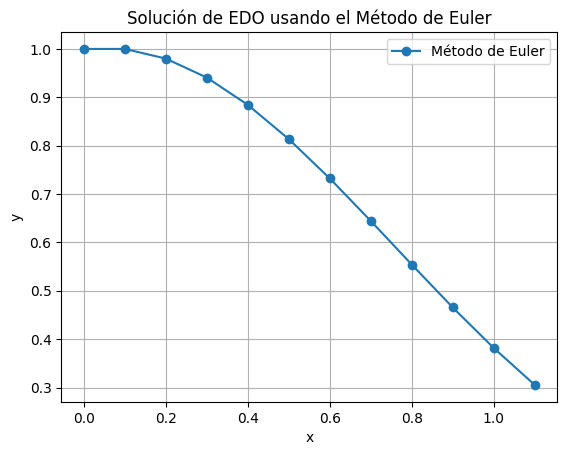

In [6]:
import matplotlib.pyplot as plt

def f(x, y):
    return -2 * x * y

def f_prime(x, y):
    return -2 * y - 2 * x * f(x, y)

def f_double_prime(x, y):
    return -2 * f(x, y) - 2 * x * f_prime(x, y)

def f_triple_prime(x, y):
    return -2 * f_prime(x, y) - 2 * x * f_double_prime(x, y)

# Metodo de Euler
def euler_method(x0, y0, xf, h):
    """
    x0, y0: Condiciones iniciales
    xf: Valor final de x
    h: Tamaño del paso
    Retorna listas con valores de x y y
    """
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < xf:
        y = y + h * f(x, y)
        x = x + h
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values


x0 = 0
y0 = 1
xf = 1
h = 0.1
x_euler, y_euler = euler_method(x0, y0, xf, h)
print(f"Solución de Euler: y({xf}) = {y_euler[-1]:.4f}")
plt.plot(x_euler, y_euler, marker='o', label="Método de Euler")
plt.title("Solución de EDO usando el Método de Euler")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


# Metodo de Euler Mejorado

Solución de Euler Mejorado: y(1) = 0.2997


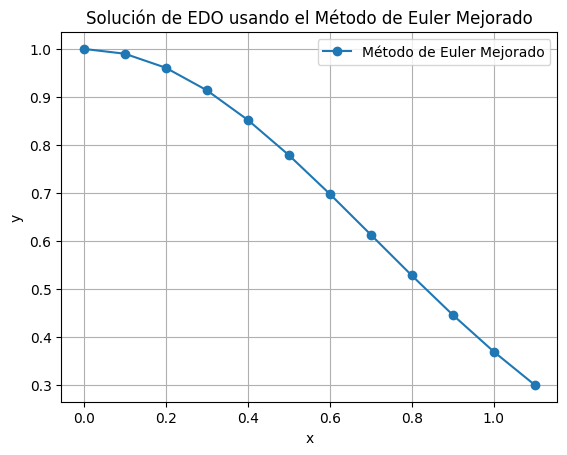

In [7]:
# Método de Euler Mejorado (Heun)
def euler_mejorado(x0, y0, xf, h):
    """
    x0, y0: Condiciones iniciales
    xf: Valor final de x
    h: Tamaño del paso
    Retorna listas con valores de x y y
    """
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < xf:
        # Predicción (Euler)
        y_pred = y + h * f(x, y)
        x_next = x + h
        # Corrección (promedio de pendientes)
        y = y + (h / 2) * (f(x, y) + f(x_next, y_pred))
        x = x_next
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values


x0 = 0
y0 = 1
xf = 1
h = 0.1
x_euler_mej, y_euler_mej = euler_mejorado(x0, y0, xf, h)
print(f"Solución de Euler Mejorado: y({xf}) = {y_euler_mej[-1]:.4f}")
plt.plot(x_euler_mej, y_euler_mej, marker='o', label="Método de Euler Mejorado")
plt.title("Solución de EDO usando el Método de Euler Mejorado")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Metodo de Taylor de mayor orden

Solución de Taylor: y(1) = 0.2970


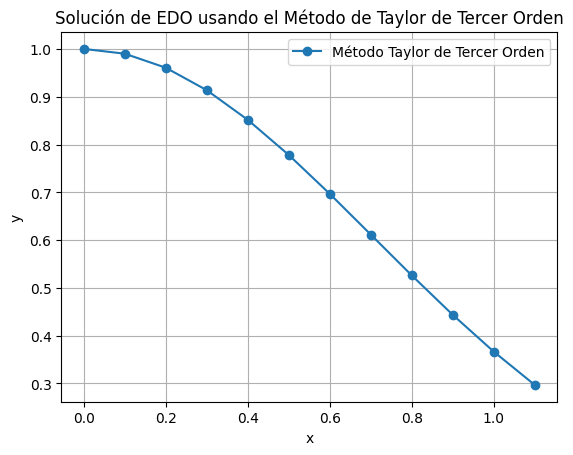

In [8]:
# Metodo de Taylor de orden 3
def taylor_method(x0, y0, xf, h):
    """
    x0, y0: Condiciones iniciales
    xf: Valor final de x
    h: Tamaño del paso
    Retorna listas con valores de x y y
    """
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < xf:
        # Serie de Taylor: y(n+1) = y(n) + h*f + (h^2/2)*f' + (h^3/6)*f''
        y = (y + h * f(x, y) + (h**2 / 2) * f_prime(x, y) +
             (h**3 / 6) * f_double_prime(x, y))
        x = x + h
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x0 = 0
y0 = 1
xf = 1
h = 0.1
x_taylor, y_taylor = taylor_method(x0, y0, xf, h)
print(f"Solución de Taylor: y({xf}) = {y_taylor[-1]:.4f}")
plt.plot(x_taylor, y_taylor, marker='o', label="Método Taylor de Tercer Orden")
plt.title("Solución de EDO usando el Método de Taylor de Tercer Orden")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Método de Runge Kutta

Solución de Taylor: y(1) = 0.2982


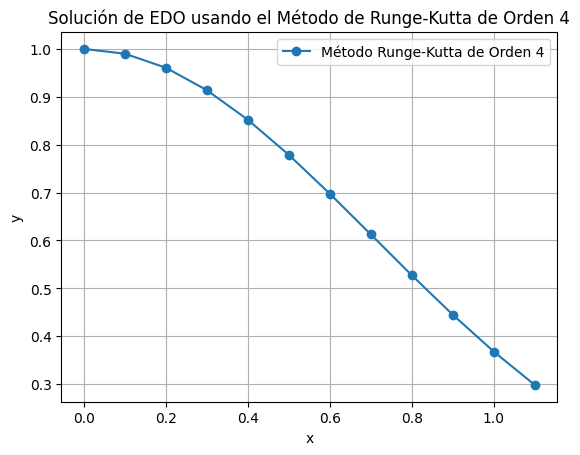

In [11]:
# Método de Runge-Kutta de orden 4
def runge_kutta_4(x0, y0, xf, h):
    """
    x0, y0: Condiciones iniciales
    xf: Valor final de x
    h: Tamaño del paso
    Retorna listas con valores de x y y
    """
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < xf:
        k1 = f(x, y)
        k2 = f(x + h/2, y + (h/2) * k1)
        k3 = f(x + h/2, y + (h/2) * k2)
        k4 = f(x + h, y + h * k3)

        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x0 = 0
y0 = 1
xf = 1
h = 0.1
x_rk4, y_rk4 = runge_kutta_4(x0, y0, xf, h)
print(f"Solución de Taylor: y({xf}) = {y_rk4[-1]:.4f}")
plt.plot(x_rk4, y_rk4, marker='o', label="Método Runge-Kutta de Orden 4")
plt.title("Solución de EDO usando el Método de Runge-Kutta de Orden 4")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()